In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3 # database 

%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


#importing function
import reduceLabel
import labelArson
import lebelLightning



In [3]:
# connecting connection with database
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")
cursor = conn.cursor()

In [4]:
# checking required table from master databse 
df_table = pd.read_sql_query("select * from sqlite_master where type = 'table' order by rootpage desc",conn)
df_table.head(5)

,type,name,tbl_name,rootpage,sql
0,table,NWCG_UnitIDActive_20170109,NWCG_UnitIDActive_20170109,776416,CREATE TABLE NWCG_UnitIDActive_20170109 (OBJEC...
1,table,idx_Fires_Shape_parent,idx_Fires_Shape_parent,677303,"CREATE TABLE ""idx_Fires_Shape_parent""(nodeno I..."
2,table,idx_Fires_Shape_rowid,idx_Fires_Shape_rowid,677302,"CREATE TABLE ""idx_Fires_Shape_rowid""(rowid INT..."
3,table,idx_Fires_Shape_node,idx_Fires_Shape_node,677301,"CREATE TABLE ""idx_Fires_Shape_node""(nodeno INT..."
4,table,Fires,Fires,5673,CREATE TABLE Fires (OBJECTID integer primary k...


In [6]:
# checking features in Fire table
df_fire = pd.read_sql_query("Select * from fires",conn)
df_fire

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [7]:
# printing out all features name in fires table
cursor.execute("Select * from fires")
columns_list =[ item[0] for item in cursor.description ]
print(columns_list ) 

['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Shape']


In [8]:
# query on fire table with importances featues base on poject objective 
df_original = pd.read_sql_query("""select FIRE_YEAR ,NWCG_REPORTING_AGENCY,
                                STAT_CAUSE_DESCR, FIRE_SIZE,
                                LATITUDE,LONGITUDE,
                                STATE,DISCOVERY_DATE from Fires """,conn )



In [9]:
# copy original data in sample data for further prosessing 
df_sample = df_original.copy()
df_sample

,FIRE_YEAR,NWCG_REPORTING_AGENCY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE
0,2005,FS,Miscellaneous,0.10,40.036944,-121.005833,CA,2453403.5
1,2004,FS,Lightning,0.25,38.933056,-120.404444,CA,2453137.5
2,2004,FS,Debris Burning,0.10,38.984167,-120.735556,CA,2453156.5
3,2004,FS,Lightning,0.10,38.559167,-119.913333,CA,2453184.5
4,2004,FS,Lightning,0.10,38.559167,-119.933056,CA,2453184.5
...,...,...,...,...,...,...,...,...
1880460,2015,ST/C&L,Missing/Undefined,0.01,40.481637,-122.389375,CA,2457291.5
1880461,2015,ST/C&L,Miscellaneous,0.20,37.617619,-120.938570,CA,2457300.5
1880462,2015,ST/C&L,Missing/Undefined,0.10,37.617619,-120.938570,CA,2457144.5
1880463,2015,ST/C&L,Missing/Undefined,2.00,37.672235,-120.898356,CA,2457309.5


In [10]:
# taking sample 10% from original data ( 1.8 million data ) and STAT_CAUSE_DESCR feature is target feature.
X = df_sample.drop('STAT_CAUSE_DESCR',axis = 1)
y = df_sample[['STAT_CAUSE_DESCR']]
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1, stratify = y,random_state = 42)

In [14]:
# checking shape of sample data 
# it should be 10% of original data 
print(X_test.shape,y_test.shape)

(188047, 7) (188047, 1)


In [12]:
# join target feature and features for another data Exploration and analysis
df_final = X_test.join(y_test)
df = df_final
df

,FIRE_YEAR,NWCG_REPORTING_AGENCY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,STAT_CAUSE_DESCR
1679293,2013,ST/C&L,6.00,36.087380,-91.770630,AR,2456477.5,Missing/Undefined
185900,1994,BIA,0.20,45.976300,-89.889600,WI,2449463.5,Children
851219,2000,ST/C&L,1.50,31.413600,-87.267200,AL,2451890.5,Debris Burning
1199487,2010,ST/C&L,50.00,38.072160,-82.116499,WV,2455512.5,Arson
87485,1996,FS,0.10,45.508333,-116.078333,ID,2450309.5,Lightning
...,...,...,...,...,...,...,...,...
813822,2005,ST/C&L,1.00,31.356900,-88.920800,MS,2453697.5,Arson
375899,2004,ST/C&L,0.10,41.940000,-71.080000,MA,2453185.5,Miscellaneous
685184,1995,ST/C&L,0.50,45.733333,-68.300000,ME,2449952.5,Missing/Undefined
1394539,1993,ST/C&L,1.08,31.515700,-83.754900,GA,2449224.5,Debris Burning


In [16]:
# checking sample data manually by index matching 
print(df_original.loc[1199487])
print("------------------------------------")
print(df_original.loc[185900])

FIRE_YEAR                       2010
NWCG_REPORTING_AGENCY         ST/C&L
STAT_CAUSE_DESCR               Arson
FIRE_SIZE                         50
LATITUDE                     38.0722
LONGITUDE                   -82.1165
STATE                             WV
DISCOVERY_DATE           2.45551e+06
Name: 1199487, dtype: object
------------------------------------
FIRE_YEAR                       1994
NWCG_REPORTING_AGENCY            BIA
STAT_CAUSE_DESCR            Children
FIRE_SIZE                        0.2
LATITUDE                     45.9763
LONGITUDE                   -89.8896
STATE                             WI
DISCOVERY_DATE           2.44946e+06
Name: 185900, dtype: object


## Data Exploration and Analysis

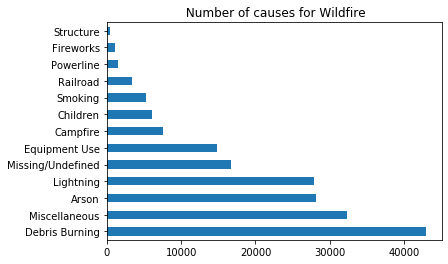

In [17]:
# checking classes(causes of wildfire) on target feature
df.STAT_CAUSE_DESCR.value_counts().plot(kind = 'barh' , title = " Number of causes for Wildfire")
plt.show()

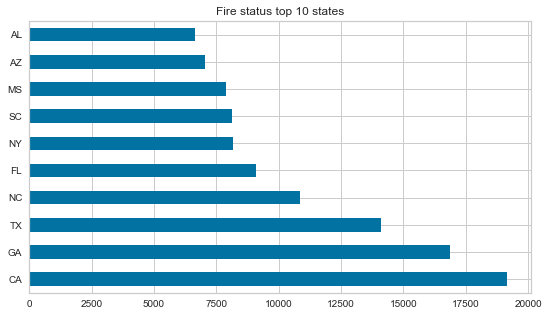

In [189]:
# top ten state on wildfire incident 
df.STATE.value_counts()[:10].plot(kind='barh',figsize = (9,5),title = 'Fire status top 10 states')

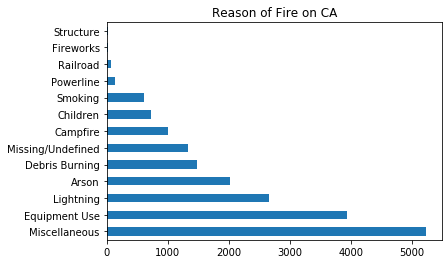

In [18]:
# Causes of wildfire of top state (CA)
df[df.STATE == 'CA'].STAT_CAUSE_DESCR.value_counts().plot(kind='barh',title ='Reason of Fire on CA')

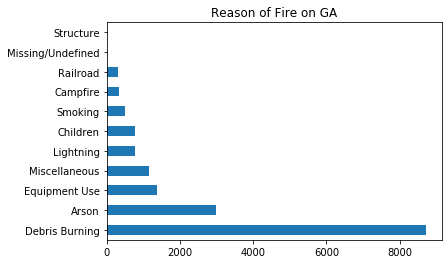

In [19]:
# Causes of wildfire of second top state (GA)
df[df.STATE == 'GA'].STAT_CAUSE_DESCR.value_counts().plot(kind='barh',title ='Reason of Fire on GA')

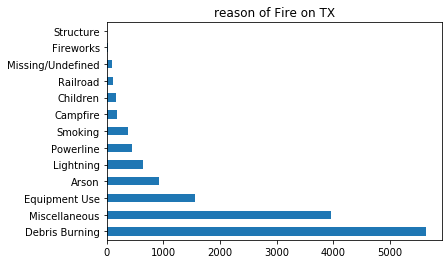

In [20]:
# Causes of wildfire of third top state (TX)
df[df.STATE == 'TX'].STAT_CAUSE_DESCR.value_counts().plot(kind='barh',title ='reason of Fire on TX')

In [193]:
# Reducing class label in df.STAT_CAUSE_DESCR
"""
def set_label(reason):
    #cause = 0
    natural = ['Lightning']
    accidental = ['Debris Burning', 'Campfire' , 'Equipment Use', 'Children', 'Railroad', 'Smoking',
                  'Powerline', 'Structure', 'Fireworks']
    malicious = ['Arson']
    other = ['Miscellaneous','Missing/Undefined']
    
    if reason in natural:
        cause = 'natural'
    elif reason in accidental:
        cause = 'accident'
    elif reason in malicious:
        cause = 'crime'
    elif reason in other:
        cause = 'other'
    return cause  

"""

"\ndef set_label(reason):\n    #cause = 0\n    natural = ['Lightning']\n    accidental = ['Debris Burning', 'Campfire' , 'Equipment Use', 'Children', 'Railroad', 'Smoking',\n                  'Powerline', 'Structure', 'Fireworks']\n    malicious = ['Arson']\n    other = ['Miscellaneous','Missing/Undefined']\n    \n    if reason in natural:\n        cause = 'natural'\n    elif reason in accidental:\n        cause = 'accident'\n    elif reason in malicious:\n        cause = 'crime'\n    elif reason in other:\n        cause = 'other'\n    return cause  \n\n"

In [194]:
"""
def set_label_one_arson(reason):
        cause =0
        if reason == 'Arson':
            cause =1
        else:
            cause =0
        return cause    

"""

"\ndef set_label_one_arson(reason):\n        cause =0\n        if reason == 'Arson':\n            cause =1\n        else:\n            cause =0\n        return cause    \n\n"

In [195]:
"""
def set_label_one_light(reason):
        cause =0
        if reason == 'Lightning':
            cause =1
        else:
            cause = 0
        return cause 
"""        

"\ndef set_label_one_light(reason):\n        cause =0\n        if reason == 'Lightning':\n            cause =1\n        else:\n            cause = 0\n        return cause \n"

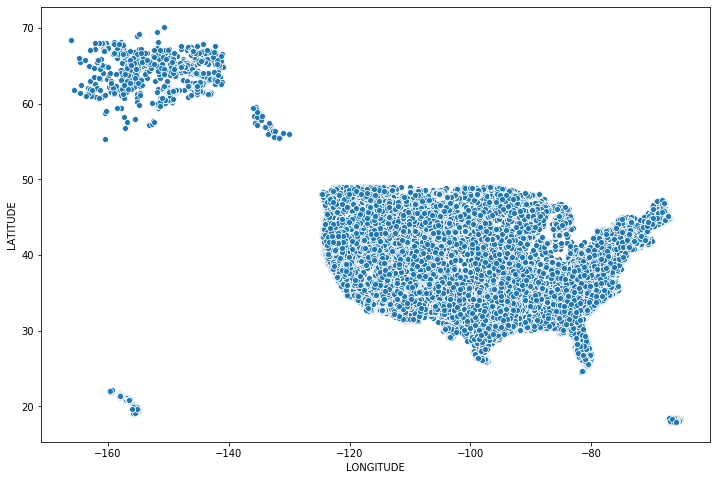

In [22]:
# plot place of wildfire by given longitude and latitude data 
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data = df)

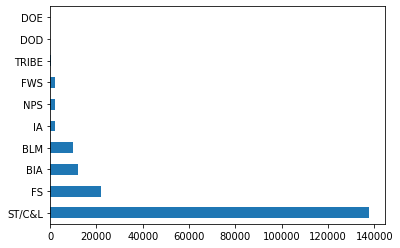

In [30]:
# plot name of reporting agency of wildfire 
df.NWCG_REPORTING_AGENCY.value_counts().plot(kind='barh')

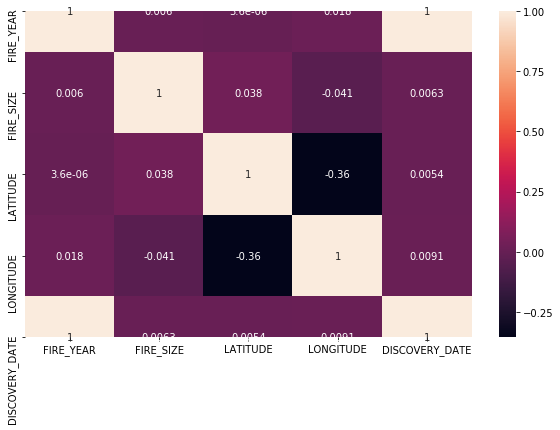

In [32]:
# correlation between features by heatmap plot
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot =True)

In [23]:
# find out year , month , weekday from Discovery_date which is given
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(),unit='D')
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
#df['WEEKDAY'] = df['DATE'].dt.weekday_name
df['WEEKDAY'] = pd.DatetimeIndex(df['DATE']).weekday_name
df

,FIRE_YEAR,NWCG_REPORTING_AGENCY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,STAT_CAUSE_DESCR,DATE,MONTH,WEEKDAY
1679293,2013,ST/C&L,6.00,36.087380,-91.770630,AR,2456477.5,Missing/Undefined,2013-07-04,7,Thursday
185900,1994,BIA,0.20,45.976300,-89.889600,WI,2449463.5,Children,1994-04-21,4,Thursday
851219,2000,ST/C&L,1.50,31.413600,-87.267200,AL,2451890.5,Debris Burning,2000-12-12,12,Tuesday
1199487,2010,ST/C&L,50.00,38.072160,-82.116499,WV,2455512.5,Arson,2010-11-12,11,Friday
87485,1996,FS,0.10,45.508333,-116.078333,ID,2450309.5,Lightning,1996-08-14,8,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
813822,2005,ST/C&L,1.00,31.356900,-88.920800,MS,2453697.5,Arson,2005-11-23,11,Wednesday
375899,2004,ST/C&L,0.10,41.940000,-71.080000,MA,2453185.5,Miscellaneous,2004-06-29,6,Tuesday
685184,1995,ST/C&L,0.50,45.733333,-68.300000,ME,2449952.5,Missing/Undefined,1995-08-23,8,Wednesday
1394539,1993,ST/C&L,1.08,31.515700,-83.754900,GA,2449224.5,Debris Burning,1993-08-25,8,Wednesday


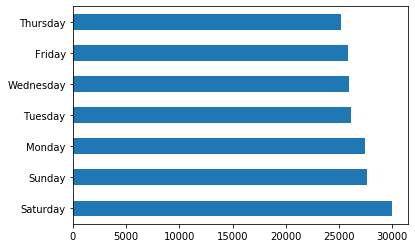

In [24]:
# Analysis wildfire happended by weekday
df.WEEKDAY.value_counts().plot(kind='barh')

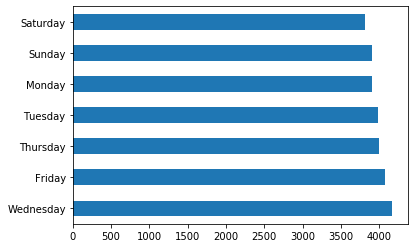

In [25]:
# Analysis most important cause natural ( Lightning) with weekday

df[df['STAT_CAUSE_DESCR']=='Lightning'].WEEKDAY.value_counts().plot(kind='barh')

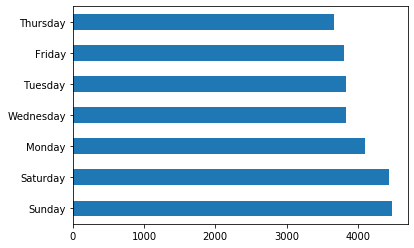

In [27]:
# Analysis Crime  cause ( Arson ) with weekday

df[df['STAT_CAUSE_DESCR']=='Arson'].WEEKDAY.value_counts().plot(kind='barh')

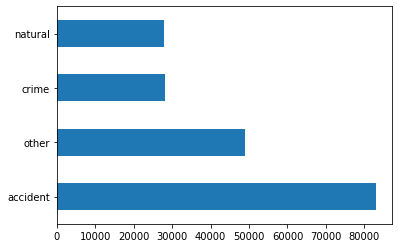

In [28]:
# Reduce classes on target featute into four features
#  Crime (arson) , Natural(lightning) , Accident , Other

df['LABEL'] = df['STAT_CAUSE_DESCR'].apply(reduceLabel.set_label)
df.LABEL.value_counts().plot(kind ='barh')

In [29]:
# one-hot encode with only one feature Lighting  
#df['LIGHTNING'] = df['STAT_CAUSE_DESCR'].apply(lebelLightning.set_label_one_light)
#df.LIGHTNING.value_counts().plot(kind ='bar')

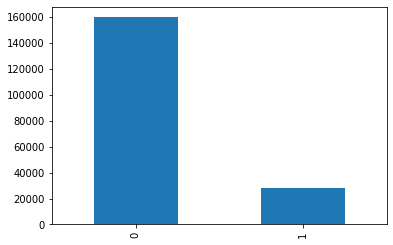

In [32]:
 # one-hot encode with only one feature Crime (Arson)  
df['ARSON'] = df['STAT_CAUSE_DESCR'].apply(labelArson.set_label_one_arson)
df.ARSON.value_counts().plot(kind ='bar')

In [43]:
# Analysis overview of data like null, datatype of features etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188047 entries, 1679293 to 1349128
Data columns (total 14 columns):
FIRE_YEAR                188047 non-null int64
NWCG_REPORTING_AGENCY    188047 non-null object
FIRE_SIZE                188047 non-null float64
LATITUDE                 188047 non-null float64
LONGITUDE                188047 non-null float64
STATE                    188047 non-null object
DISCOVERY_DATE           188047 non-null float64
STAT_CAUSE_DESCR         188047 non-null object
DATE                     188047 non-null datetime64[ns]
MONTH                    188047 non-null int64
WEEKDAY                  188047 non-null object
LIGHTNING                188047 non-null int64
ARSON                    188047 non-null int64
LABEL                    188047 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 26.5+ MB


In [31]:
# 
df.head()

,FIRE_YEAR,NWCG_REPORTING_AGENCY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,STAT_CAUSE_DESCR,DATE,MONTH,WEEKDAY,LABEL,ARSON
1679293,2013,ST/C&L,6.0,36.087380,-91.770630,AR,2456477.5,Missing/Undefined,2013-07-04,7,Thursday,other,0
185900,1994,BIA,0.2,45.976300,-89.889600,WI,2449463.5,Children,1994-04-21,4,Thursday,accident,0
851219,2000,ST/C&L,1.5,31.413600,-87.267200,AL,2451890.5,Debris Burning,2000-12-12,12,Tuesday,accident,0
1199487,2010,ST/C&L,50.0,38.072160,-82.116499,WV,2455512.5,Arson,2010-11-12,11,Friday,crime,1
87485,1996,FS,0.1,45.508333,-116.078333,ID,2450309.5,Lightning,1996-08-14,8,Wednesday,natural,0


In [33]:
# labeling all Categorical data 
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['NWCG_REPORTING_AGENCY'] = la.fit_transform(df['NWCG_REPORTING_AGENCY'])
df['STAT_CAUSE_DESCR'] = la.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = la.fit_transform(df['STATE'])
df['WEEKDAY'] = la.fit_transform(df['WEEKDAY'])
df['LABEL'] = la.fit_transform(df['LABEL'])

In [40]:
# interpret data after  labelEncoder
df.head()

,FIRE_YEAR,NWCG_REPORTING_AGENCY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,STAT_CAUSE_DESCR,DATE,MONTH,WEEKDAY,LABEL,ARSON
1679293,2013,8,6.0,36.087380,-91.770630,2,2456477.5,8,2013-07-04,7,4,3,0
185900,1994,0,0.2,45.976300,-89.889600,49,2449463.5,2,1994-04-21,4,4,0,0
851219,2000,8,1.5,31.413600,-87.267200,1,2451890.5,3,2000-12-12,12,5,0,0
1199487,2010,8,50.0,38.072160,-82.116499,50,2455512.5,0,2010-11-12,11,0,1,1
87485,1996,4,0.1,45.508333,-116.078333,13,2450309.5,6,1996-08-14,8,6,2,0


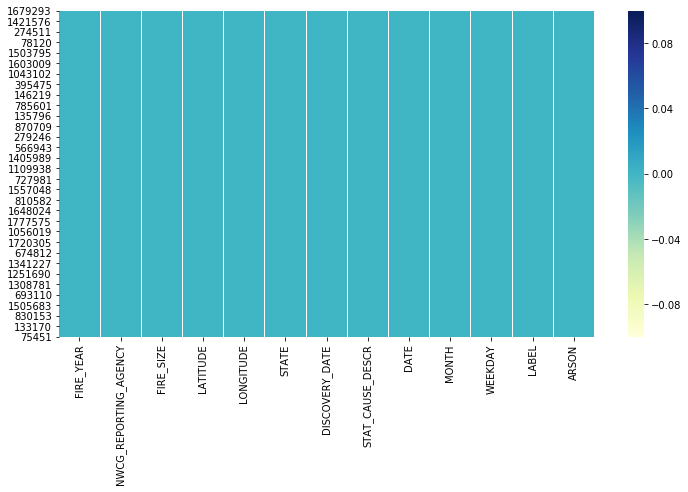

In [35]:
# checking null values by heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),cmap="YlGnBu")

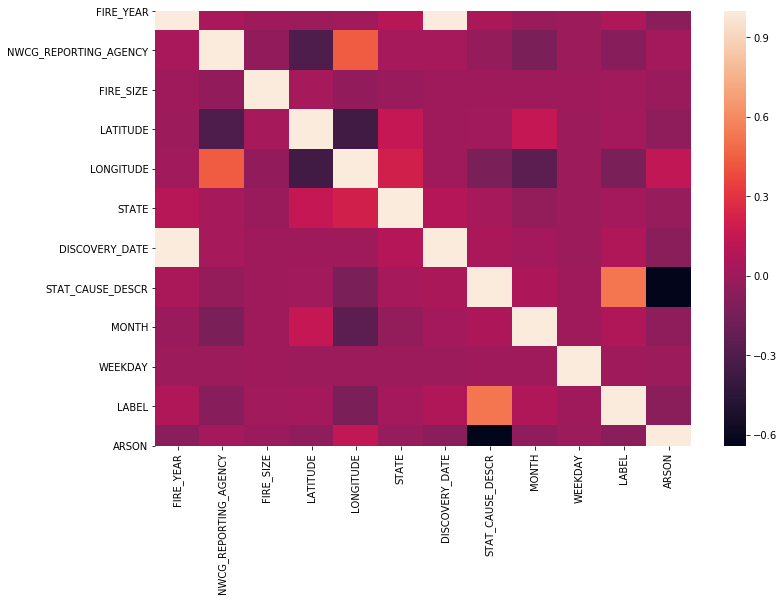

In [39]:
# checking correlation again after data manipulation 
plt.figure(figsize = (12,8))
sns.heatmap(df.corr())

In [41]:
# Preparing data for spliting train and test data of four class of target feature 
df_four = df.drop(['STAT_CAUSE_DESCR','DISCOVERY_DATE','DATE','ARSON'],axis = 1)
df_four

,FIRE_YEAR,NWCG_REPORTING_AGENCY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,MONTH,WEEKDAY,LABEL
1679293,2013,8,6.00,36.087380,-91.770630,2,7,4,3
185900,1994,0,0.20,45.976300,-89.889600,49,4,4,0
851219,2000,8,1.50,31.413600,-87.267200,1,12,5,0
1199487,2010,8,50.00,38.072160,-82.116499,50,11,0,1
87485,1996,4,0.10,45.508333,-116.078333,13,8,6,2
...,...,...,...,...,...,...,...,...,...
813822,2005,8,1.00,31.356900,-88.920800,25,11,6,1
375899,2004,8,0.10,41.940000,-71.080000,19,6,5,3
685184,1995,8,0.50,45.733333,-68.300000,21,8,6,3
1394539,1993,8,1.08,31.515700,-83.754900,10,8,6,0


In [42]:
# Preparing data for spliting train and test data of One class(Arson) of target feature 
df_arson = df.drop(['STAT_CAUSE_DESCR','DISCOVERY_DATE','DATE','LABEL','NWCG_REPORTING_AGENCY','FIRE_SIZE'],axis = 1)
df_arson

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,MONTH,WEEKDAY,ARSON
1679293,2013,36.087380,-91.770630,2,7,4,0
185900,1994,45.976300,-89.889600,49,4,4,0
851219,2000,31.413600,-87.267200,1,12,5,0
1199487,2010,38.072160,-82.116499,50,11,0,1
87485,1996,45.508333,-116.078333,13,8,6,0
...,...,...,...,...,...,...,...
813822,2005,31.356900,-88.920800,25,11,6,1
375899,2004,41.940000,-71.080000,19,6,5,0
685184,1995,45.733333,-68.300000,21,8,6,0
1394539,1993,31.515700,-83.754900,10,8,6,0


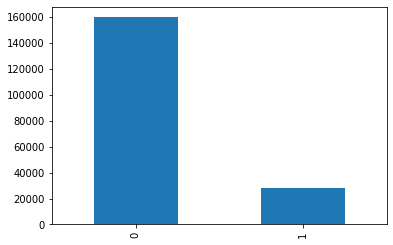

In [43]:
# analysis imbalance data in target feature 
df_arson['ARSON'].value_counts().plot(kind = 'bar')

## Modelling 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

import sklearn.model_selection as model_selection

#randomForest = RandomForestClassifier(n_estimators=50)
#DecisionTree = DecisionTreeClassifier()
#Svm_model = SVC()
#KNN=KNeighborsClassifier()
#Logist = LogisticRegression()
#gauss_naive = GaussianNB()

#model_list=[randomForest,DecisionTree,Svm_model,KNN,Logist,gauss_naive]

In [45]:
#For four category class
X= df_four.drop(['LABEL'],axis = 1)
y = df_four.LABEL

In [340]:
# all class 
#X= df.drop(['STAT_CAUSE_DESCR'],axis = 1)
#y = df.STAT_CAUSE_DESCR

(100000, 10)

In [55]:
# split data into train and test data 
# SMOTE class balance target inbalance data by oversampling 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state = 43)

sm= SMOTE(random_state=23)
X_train,y_train = sm.fit_sample(X_train,y_train)
X_test,y_test = sm.fit_sample(X_test,y_test)

print(X_train.shape,X_test.shape)

(239780, 6) (80024, 6)


In [47]:
# check balance in target feature 
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3]), array([20707, 20707, 20707, 20707]))

In [56]:
# scalling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scale = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_train_scale.head()

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,MONTH,WEEKDAY
0,1.662097,-0.206071,0.656105,0.241943,-1.536863,1.602076
1,-0.635611,-1.343468,0.822449,-0.921896,-0.226765,1.602076
2,0.896194,0.562192,-0.140889,-0.469292,-1.209338,1.089617
3,0.896194,1.967901,-1.581119,1.599755,0.755809,0.577158
4,-0.482430,-1.054853,0.774671,-0.921896,-0.554289,-0.960218


## For four Classes Accident , Natural , Crime , Other 

In [50]:
# model fitting by cross validation for only one class 
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RN',RandomForestClassifier()))

results = []
names = []
for name,model in models:
    #Kfold = model_selection.KFold(n_splits=10,random_state=23)
    cv_result = model_selection.cross_validate(model,X = X_train,y = y_train,cv = 10,scoring='accuracy')
    #results.append(cv_result['test_score'])
    #names.append(name)
    msg = "%s Accuracy_score:%f std:(%f) " %(name,cv_result['test_score'].mean(), cv_result['test_score'].std())
    print(msg)

LR Accuracy_score:0.402468 std:(0.005459) 
KNN Accuracy_score:0.739594 std:(0.032133) 
CART Accuracy_score:0.694125 std:(0.030918) 
NB Accuracy_score:0.466783 std:(0.013459) 
RN Accuracy_score:0.788450 std:(0.034888) 


In [51]:
#Accuracy score in test data of four class  
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,f1_score,recall_score
from yellowbrick.classifier import ConfusionMatrix
for name,model in models:
    y_pred = model.fit(X_train,y_train).predict(X_test)
    print(f"{name} test data accuracy_score:{round(accuracy_score(y_test,y_pred),6)} ") 

LR test data accuracy_score:0.404851 
KNN test data accuracy_score:0.597117 
CART test data accuracy_score:0.586384 
NB test data accuracy_score:0.47426 
RN test data accuracy_score:0.676402 


LR test data accuracy_score:0.404851 


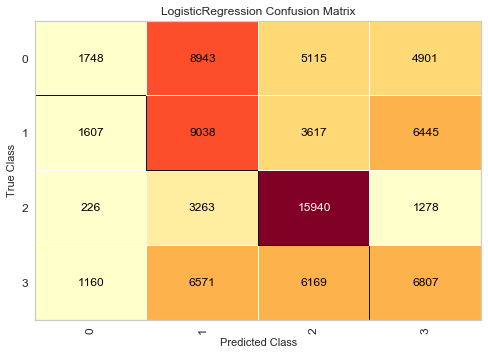

KNN test data accuracy_score:0.597117 


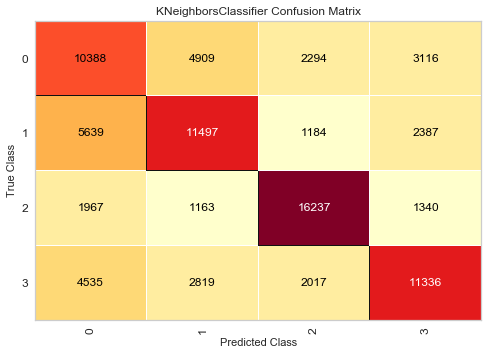

CART test data accuracy_score:0.58677 


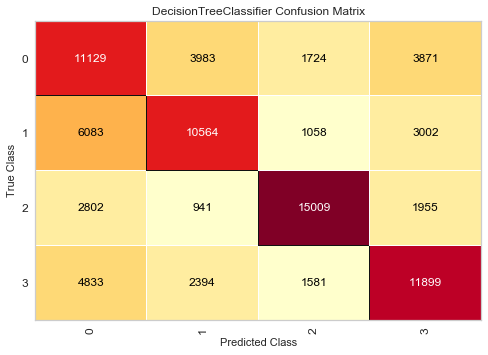

NB test data accuracy_score:0.47426 


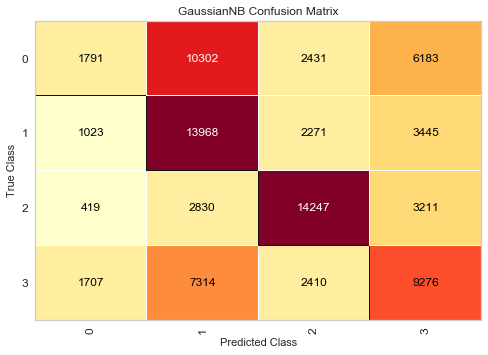

RN test data accuracy_score:0.676486 


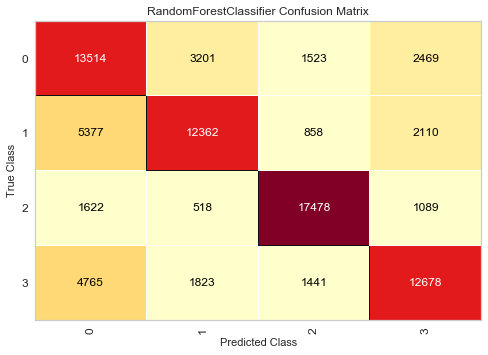

In [52]:
#Accuracy score in test data of four class  
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,f1_score,recall_score
from yellowbrick.classifier import ConfusionMatrix
for name,model in models:
    y_pred = model.fit(X_train,y_train).predict(X_test)
    print(f"{name} test data accuracy_score:{round(accuracy_score(y_test,y_pred),6)} ")
    cm = ConfusionMatrix(model,classes =[0,1,2,3])
    cm.fit(X_train,y_train)
    cm.score(X_test,y_test)
    cm.poof()

In [53]:
# display number of confusion matrix 
print("Confusion Matrix of four class target features by Logistic Regression algorithm")
print("-------------------------------------------------------------------------------")
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pred_0','pred_1','pred_2','pred_3'],index=['true_0','true_1','true_2','true_3'])

Confusion Matrix of four class target features by Logistic Regression algorithm
-------------------------------------------------------------------------------


,pred_0,pred_1,pred_2,pred_3
true_0,13514,3201,1523,2469
true_1,5377,12362,858,2110
true_2,1622,518,17478,1089
true_3,4765,1823,1441,12678


## Modelling for predicting one class Crime ( Arson)

In [57]:
# for Arson category
X= df_arson.drop(['ARSON'],axis = 1)
y = df_arson.ARSON

In [58]:
# split data into train and test data 
# SMOTE class balance target inbalance data by oversampling 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state = 43)

sm= SMOTE(random_state=23)
X_train,y_train = sm.fit_sample(X_train,y_train)
X_test,y_test = sm.fit_sample(X_test,y_test)

print(X_train.shape,X_test.shape)

(239780, 6) (80024, 6)


In [59]:
# check balance in target feature 
np.unique(y_test,return_counts=True)

(array([0, 1]), array([40012, 40012]))

In [60]:
# scalling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scale = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_train_scale.head()

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,MONTH,WEEKDAY
0,1.662097,-0.206071,0.656105,0.241943,-1.536863,1.602076
1,-0.635611,-1.343468,0.822449,-0.921896,-0.226765,1.602076
2,0.896194,0.562192,-0.140889,-0.469292,-1.209338,1.089617
3,0.896194,1.967901,-1.581119,1.599755,0.755809,0.577158
4,-0.482430,-1.054853,0.774671,-0.921896,-0.554289,-0.960218


In [61]:
# model fitting by cross validation for only one class ( Arson )
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RN',RandomForestClassifier()))

results = []
names = []
for name,model in models:
    #Kfold = model_selection.KFold(n_splits=10,random_state=23)
    cv_result = model_selection.cross_validate(model,X = X_train,y = y_train,cv = 10,scoring=['accuracy','f1','recall','precision'])
    #results.append(cv_result['test_score'])
    #names.append(name)
    msg = "%s Accuracy_score:%f std:(%f) ,f1_score: %f ,Recall : %f , Precision: %f" %(name,cv_result['test_accuracy'].mean(),
                                                                                       cv_result['test_accuracy'].std(),
                                                                                       cv_result['test_f1'].mean(),
                                                                                       cv_result['test_recall'].mean(),
                                                                                       cv_result['test_precision'].mean())
    print(msg)

LR Accuracy_score:0.598932 std:(0.003940) ,f1_score: 0.623203 ,Recall : 0.663391 , Precision: 0.587622
KNN Accuracy_score:0.845204 std:(0.007241) ,f1_score: 0.858527 ,Recall : 0.939795 , Precision: 0.790268
CART Accuracy_score:0.815631 std:(0.013674) ,f1_score: 0.818695 ,Recall : 0.833914 , Precision: 0.804368
NB Accuracy_score:0.634828 std:(0.002618) ,f1_score: 0.672877 ,Recall : 0.751180 , Precision: 0.609373
RN Accuracy_score:0.884315 std:(0.014703) ,f1_score: 0.887001 ,Recall : 0.910326 , Precision: 0.865213


In [62]:
#Accuracy score in test data 
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,f1_score,recall_score
from yellowbrick.classifier import ConfusionMatrix
for name,model in models:
    y_pred = model.fit(X_train,y_train).predict(X_test)
    print(f"{name} test data accuracy_score:{round(accuracy_score(y_test,y_pred),6)}  f1_score:{round(f1_score(y_test,y_pred),6)}  recall_score:{round(recall_score(y_test,y_pred),6)}  Precision score:{round(precision_score(y_test,y_pred),6)}")
 
  

LR test data accuracy_score:0.60152  f1_score:0.62698  recall_score:0.669774  Precision score:0.589326
KNN test data accuracy_score:0.706051  f1_score:0.691473  recall_score:0.658802  Precision score:0.727554
CART test data accuracy_score:0.699003  f1_score:0.664914  recall_score:0.597271  Precision score:0.749835
NB test data accuracy_score:0.633785  f1_score:0.672676  recall_score:0.752599  Precision score:0.608098
RN test data accuracy_score:0.742602  f1_score:0.707423  recall_score:0.622363  Precision score:0.819414


LR test data accuracy_score:0.60152  f1_score:0.62698  recall_score:0.669774  Precision score:0.589326


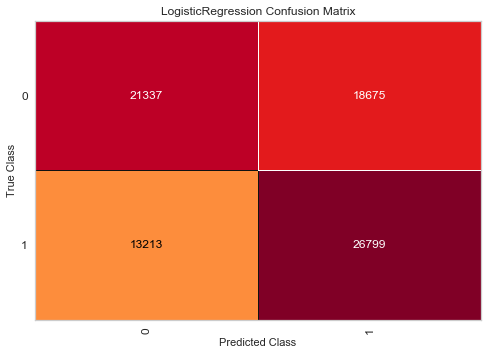

KNN test data accuracy_score:0.706051  f1_score:0.691473  recall_score:0.658802  Precision score:0.727554


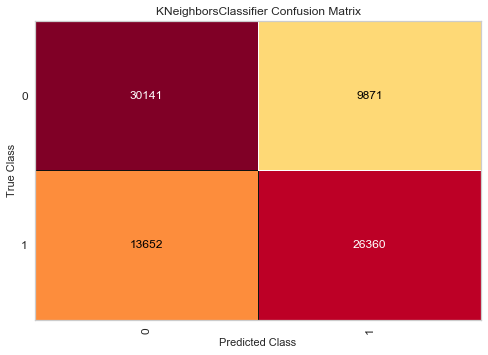

CART test data accuracy_score:0.699128  f1_score:0.66495  recall_score:0.597121  Precision score:0.750165


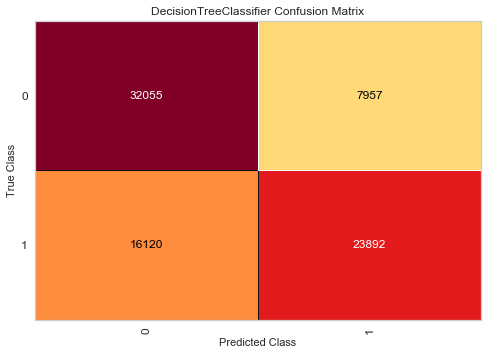

NB test data accuracy_score:0.633785  f1_score:0.672676  recall_score:0.752599  Precision score:0.608098


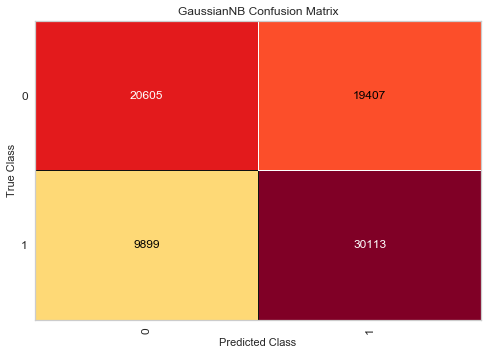

RN test data accuracy_score:0.742677  f1_score:0.707517  recall_score:0.622463  Precision score:0.819492


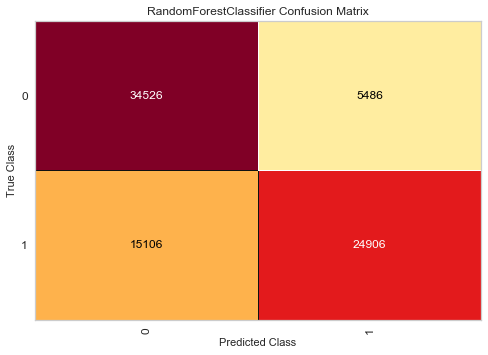

In [63]:
#Accuracy score in test data 
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,f1_score,recall_score
from yellowbrick.classifier import ConfusionMatrix
for name,model in models:
    y_pred = model.fit(X_train,y_train).predict(X_test)
    print(f"{name} test data accuracy_score:{round(accuracy_score(y_test,y_pred),6)}  f1_score:{round(f1_score(y_test,y_pred),6)}  recall_score:{round(recall_score(y_test,y_pred),6)}  Precision score:{round(precision_score(y_test,y_pred),6)}")
    cm = ConfusionMatrix(model,classes =[0,1])
    cm.fit(X_train,y_train)
    cm.score(X_test,y_test)
    cm.poof()

In [64]:
# display no of confusion matrix of train data by randomforest algorithm
from sklearn.metrics import confusion_matrix,precision_score
y_pred_rand_train = randomForest.predict(X_train)
conm = confusion_matrix(y_train,y_pred_rand_train)
print(conm)

NameError: name 'randomForest' is not defined

In [ ]:
# confusion matrix of test data 
y_pred_rand = randomForest.predict(X_test)
conm = confusion_matrix(y_test,y_pred_rand)
print(conm)

## Rough

In [148]:
gauss_naive.fit(X_train,y_train)
gauss_naive.score(X_train,y_train)

0.4713941728870696

In [155]:
y_pred = gauss_naive.predict(X_test)
print("Confusion Matrix of four Class by GaussianNB  algorithm")
print("---------------------------------------------------------")
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pred_0','pred_1','pred_2','pred_3'],index=['true_0','true_1','true_2','true_3'])

Confusion Matrix of four Class by GaussianNB  algorithm
---------------------------------------------------------


,pred_0,pred_1,pred_2,pred_3
true_0,1791,10302,2431,6183
true_1,1023,13968,2271,3445
true_2,419,2830,14247,3211
true_3,1707,7314,2410,9276


In [149]:
randomForest.fit(X_train,y_train)
randomForest.score(X_train,y_train)

0.9998755919415684

In [154]:
y_pred = randomForest.predict(X_test)
print("Confusion Matrix of four Class by Random Forest algorithm")
print("---------------------------------------------------------")
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pred_0','pred_1','pred_2','pred_3'],index=['true_0','true_1','true_2','true_3'])

Confusion Matrix of four Class by Random Forest algorithm
---------------------------------------------------------


,pred_0,pred_1,pred_2,pred_3
true_0,13434,3198,1540,2535
true_1,5472,12209,869,2157
true_2,1679,523,17445,1060
true_3,4747,1855,1481,12624


In [157]:
# KNN
KNN.fit(X_train,y_train)
KNN.score(X_train,y_train)

0.8305160927843326

In [158]:
y_pred = KNN.predict(X_test)
print("Confusion Matrix of four class by KNeighborsClassifier algorithm")
print("---------------------------------------------------------")
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pred_0','pred_1','pred_2','pred_3'],index=['true_0','true_1','true_2','true_3'])

Confusion Matrix of four class by KNeighborsClassifier algorithm
---------------------------------------------------------


,pred_0,pred_1,pred_2,pred_3
true_0,10388,4909,2294,3116
true_1,5639,11497,1184,2387
true_2,1967,1163,16237,1340
true_3,4535,2819,2017,11336


In [159]:
# Logistic Regression

Logist.fit(X_train,y_train)
Logist.score(X_train,y_train)

0.40525323059635604

In [166]:
y_pred = Logist.predict(X_test)
print("Confusion Matrix of four class target features by Logistic Regression algorithm")
print("-------------------------------------------------------------------------------")
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pred_0','pred_1','pred_2','pred_3'],index=['true_0','true_1','true_2','true_3'])

Confusion Matrix of four class target features by Logistic Regression algorithm
-------------------------------------------------------------------------------


,pred_0,pred_1,pred_2,pred_3
true_0,2332,8493,4145,5737
true_1,1944,8992,3356,6415
true_2,303,3206,15253,1945
true_3,1651,7269,4530,7257


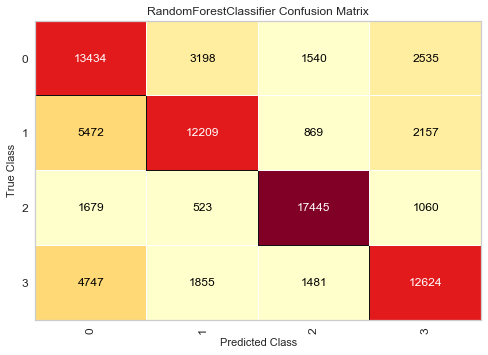

In [168]:
cm = ConfusionMatrix(randomForest,classes =[0,1,2,3])
cm.fit(X_train,y_train)
cm.score(X_test,y_test)
cm.poof()

In [163]:
pipe = Pipeline([('ss',StandardScaler()),
                ('LR',LogisticRegression(C =1000))])

In [165]:
pipe.fit(X_train,y_train)
pipe.score(X_train,y_train)

0.4142547555983626

In [67]:
randomForest.fit(X_train,y_train)
randomForest.score(X_train,y_train)

0.9998331804153807

In [477]:
KNN.fit(X_train_scale,y_train)
KNN.score(X_train_scale,y_train)

0.9473637037037037

In [437]:
Logist.fit(X_train_scale,y_train)
Logist.score(X_train_scale,y_train)

0.4488666666666667

In [438]:
y_pred_knn = KNN.predict(X_test)
conm = confusion_matrix(y_test,y_pred_knn)
print(conm)

[[ 3643     0     0     0]
 [10945     0     0     0]
 [ 3811     0     0     0]
 [ 6601     0     0     0]]


In [69]:
from sklearn.metrics import confusion_matrix,precision_score
y_pred_rand_train = randomForest.predict(X_train)
conm = confusion_matrix(y_train,y_pred_rand_train)
print(conm)

[[119862     28]
 [    12 119878]]


In [70]:
y_pred_rand = randomForest.predict(X_test)
conm = confusion_matrix(y_test,y_pred_rand)
print(conm)


[[34543  5469]
 [15375 24637]]


In [440]:
y_pred_logistic  = Logist.predict(X_test)
confusion_matrix(y_test,y_pred_logistic)

array([[   24,     0,     0,  3619],
       [    6,     0,     0, 10939],
       [    1,     0,     0,  3810],
       [    7,     0,     0,  6594]])

In [447]:
# Grid Search for logistic model

from sklearn.model_selection import GridSearchCV
hyperpara = {'Cs' : np.arange(1,100,5)}
hyperpara
gd = GridSearchCV(Logist,hyperpara,cv =5)
clf = gd.fit(X_train,y_train)
clf.best_estimator_.get_params()


AttributeError: 'LogisticRegressionCV' object has no attribute 'get_paras'

In [449]:
clf.best_estimator_.get_params()

{'Cs': 51,
 'class_weight': None,
 'cv': 'warn',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [450]:
lg = LogisticRegressionCV(Cs=51)
lg.fit(X_train,y_train)
lg.score(X_train,y_train)

0.45941333333333334

In [ ]:
#pipe = Pipeline(('ss',StandardScaler()),('LR',LogisticRegression()))
#pipe.fit(X_train,y_train)
#pipe.score(X_train,y_train)